PHASE ONE PROJECT FINAL SUBMISSION
Caroline Gesaka Nyairo
Part Time

1.Data Colllection and Data Loading
a. Find the correct dataset to use.
b. Load the datasets.
c. Merge the datasets.

In [1]:
#a.Find the correct datasets to use
#tn.movie_budgets has info on budget-analyze financial performance
#imdb.title basics has info on movie basics.ie genres titles and release years-
#will show relationship between budget allocation and box office success and also audience info
#bom.movie_gross-compliments the budget and genre info
#imdb.title.ratings csv-show additional factors to consider.

#(import the libraries)

import pandas as pd #for data manipulation
import numpy as np #for numeric computation
import matplotlib.pyplot as plt #for ploting our data and creating visualization
%matplotlib inline
import seaborn as sns # data visualization
import warnings
warnings.filterwarnings('ignore')

In [2]:
#b. load and read the datasets
movie_budgets_df= pd.read_csv(r"C:\Users\Caro\Desktop\PROJECTS\PhaseOne Final Project\tn.movie_budgets.csv\tn.movie_budgets.csv")
title_basics_df= pd.read_csv(r"C:\Users\Caro\Desktop\PROJECTS\PhaseOne Final Project\imdb.title.basics.csv\title.basics.csv")
movie_gross_df = pd.read_csv(r"C:\Users\Caro\Desktop\PROJECTS\PhaseOne Final Project\bom.movie_gross.csv\bom.movie_gross.csv")
title_ratings_df = pd.read_csv(r"C:\Users\Caro\Downloads\dsc-phase-1-project-master\dsc-phase-1-project-master\zippedData\imdb.title.ratings.csv.gz")




In [3]:
#c. Merge the four datasets
# Merge movie_budgets with title_basics
merged_data_df= pd.merge(movie_budgets_df, title_basics_df, left_on='movie', right_on='primary_title', how='inner')

# Merge merged_data with movie_gross
merged_data_df = pd.merge(merged_data_df, movie_gross_df, left_on='movie', right_on='title', how='inner')

# Merge merged_data with title_ratings
merged_data_df = pd.merge(merged_data_df, title_ratings_df, on='tconst', how='inner')

# Print the first few rows of the merged dataset
merged_data_df.head()

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title,studio,domestic_gross_y,foreign_gross,year,averagerating,numvotes
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000,2011,6.6,447624
1,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",Avengers: Age of Ultron,BV,459000000.0,946400000,2015,7.3,665594
2,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",Avengers: Infinity War,BV,678800000.0,"1,369.5",2018,8.5,670926
3,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",tt0974015,Justice League,Justice League,2017,120.0,"Action,Adventure,Fantasy",Justice League,WB,229000000.0,428900000,2017,6.5,329135
4,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923",tt2379713,Spectre,Spectre,2015,148.0,"Action,Adventure,Thriller",Spectre,Sony,200100000.0,680600000,2015,6.8,352504


2.DATA CLEANING
a.Handle the missing values.
b.Check and remove duplicates.
c.Convert Datatypes (if neccessary)

In [4]:
#a. Handling the missing values
# Check for missing values before dropping
print("Missing values  :\n", merged_data_df.isnull().sum())
#there are missing values 

#b..check and remove duplicates
# Check for duplicate rows
print("Number of duplicate rows:", merged_data_df.duplicated().sum())
#there are no duplicates

#c.Convert datatypes(if necessary)
#regex= regular expressions
# Convert financial columns to numeric
financial_columns = ['production_budget', 'domestic_gross_x', 'worldwide_gross', 'foreign_gross']
merged_data_df[financial_columns] = merged_data_df[financial_columns].replace('[\$,]', '', regex=True).astype(float)



Missing values  :
 id                     0
release_date           0
movie                  0
production_budget      0
domestic_gross_x       0
worldwide_gross        0
tconst                 0
primary_title          0
original_title         0
start_year             0
runtime_minutes       30
genres                 7
title                  0
studio                 0
domestic_gross_y       1
foreign_gross        198
year                   0
averagerating          0
numvotes               0
dtype: int64
Number of duplicate rows: 0


In [5]:
#a. Handling my missing values(runtime minutes,genre,domestic gross and foreign gross)
# Impute missing values for 'runtime_minutes' with the median
median_runtime = merged_data_df['runtime_minutes'].median()
merged_data_df['runtime_minutes'].fillna(median_runtime, inplace=True)

# fill missing values for 'genres' with the mode
mode_genre = merged_data_df['genres'].mode()[0]
merged_data_df['genres'].fillna(mode_genre, inplace=True)

# fill missing value for 'domestic_gross_y' with the mean
mean_domestic_gross = merged_data_df['domestic_gross_y'].mean()
merged_data_df['domestic_gross_y'].fillna(mean_domestic_gross, inplace=True)

# fill missing value for 'foreign_gross' with 0 (assuming it represents no foreign gross)
merged_data_df['foreign_gross'].fillna(0, inplace=True)

#print("Missing values after cleaning :\n",
merged_data_df.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross_x     0
worldwide_gross      0
tconst               0
primary_title        0
original_title       0
start_year           0
runtime_minutes      0
genres               0
title                0
studio               0
domestic_gross_y     0
foreign_gross        0
year                 0
averagerating        0
numvotes             0
dtype: int64

3.Exploratory Data Analysis(EDA)
a. Explore the cleaned dataset.
b.Analyz distributions,relationships between variables and identify patterns.
c.Visualize the data.
d.Handle Outliers
e.Calculate summary statistics to summariye the dataset.


In [6]:
#a.Explore the cleaned dataset
#load the cleaned dataset
merged_data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413 entries, 0 to 1412
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1413 non-null   int64  
 1   release_date       1413 non-null   object 
 2   movie              1413 non-null   object 
 3   production_budget  1413 non-null   float64
 4   domestic_gross_x   1413 non-null   float64
 5   worldwide_gross    1413 non-null   float64
 6   tconst             1413 non-null   object 
 7   primary_title      1413 non-null   object 
 8   original_title     1413 non-null   object 
 9   start_year         1413 non-null   int64  
 10  runtime_minutes    1413 non-null   float64
 11  genres             1413 non-null   object 
 12  title              1413 non-null   object 
 13  studio             1413 non-null   object 
 14  domestic_gross_y   1413 non-null   float64
 15  foreign_gross      1413 non-null   float64
 16  year               1413 

In [7]:
# Summary statistics for numerical columns
summary_stats = merged_data_df.describe()
summary_stats.head()


,id,production_budget,domestic_gross_x,worldwide_gross,start_year,runtime_minutes,domestic_gross_y,foreign_gross,year,averagerating,numvotes
count,1413.000000,1.413000e+03,1.413000e+03,1.413000e+03,1413.000000,1413.000000,1.413000e+03,1.413000e+03,1413.000000,1413.000000,1413.000000
mean,51.659590,4.628144e+07,6.012142e+07,1.503449e+08,2013.644020,107.195329,6.034071e+07,8.703978e+07,2013.726115,6.434961,113355.389950
std,28.606088,5.517378e+07,8.444932e+07,2.327543e+08,2.531381,19.529742,8.440944e+07,1.467756e+08,2.530131,1.029822,164093.452473
min,1.000000,5.000000e+04,0.000000e+00,0.000000e+00,2010.000000,3.000000,8.000000e+02,0.000000e+00,2010.000000,1.600000,5.000000
25%,27.000000,1.000000e+07,7.018188e+06,1.753600e+07,2011.000000,95.000000,7.200000e+06,4.300000e+06,2011.000000,5.900000,12926.000000


In [8]:
#b. Analyz the distributions
# Frequency distribution of genres
genre_counts = merged_data_df['genres'].value_counts()
print(genre_counts)

genres
Drama                         101
Adventure,Animation,Comedy     61
Comedy,Drama,Romance           51
Comedy,Drama                   50
Action,Adventure,Sci-Fi        44
                             ... 
Biography,Drama,Musical         1
Fantasy,Horror,Thriller         1
Comedy,Mystery                  1
Mystery,Thriller                1
Comedy,Thriller                 1
Name: count, Length: 216, dtype: int64


In [10]:
merged_data_df_sorted=merged_data_df.sort_values(by='numvotes', ascending=False).head(20)
merged_data_df_sorted

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title,studio,domestic_gross_y,foreign_gross,year,averagerating,numvotes
93,38,"Jul 16, 2010",Inception,160000000.0,292576195.0,8.355246e+08,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",Inception,WB,292600000.0,535700000.0,2010,8.8,1841066
5,11,"Jul 20, 2012",The Dark Knight Rises,275000000.0,448139099.0,1.084439e+09,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",The Dark Knight Rises,WB,448100000.0,636800000.0,2012,8.4,1387769
90,32,"Nov 5, 2014",Interstellar,165000000.0,188017894.0,6.663794e+08,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",Interstellar,Par.,188000000.0,489400000.0,2014,8.6,1299334
194,69,"Dec 25, 2012",Django Unchained,100000000.0,162805434.0,4.499483e+08,tt1853728,Django Unchained,Django Unchained,2012,165.0,"Drama,Western",Django Unchained,Wein.,162800000.0,262600000.0,2012,8.4,1211405
197,76,"Dec 25, 2013",The Wolf of Wall Street,100000000.0,116900694.0,3.898704e+08,tt0993846,The Wolf of Wall Street,The Wolf of Wall Street,2013,180.0,"Biography,Crime,Drama",The Wolf of Wall Street,Par.,116900000.0,275100000.0,2013,8.2,1035358
250,52,"Feb 19, 2010",Shutter Island,80000000.0,128012934.0,2.994618e+08,tt1130884,Shutter Island,Shutter Island,2010,138.0,"Mystery,Thriller",Shutter Island,Par.,128000000.0,166800000.0,2010,8.1,1005960
77,14,"Aug 1, 2014",Guardians of the Galaxy,170000000.0,333172112.0,7.708675e+08,tt2015381,Guardians of the Galaxy,Guardians of the Galaxy,2014,121.0,"Action,Adventure,Comedy",Guardians of the Galaxy,BV,333200000.0,440200000.0,2014,8.1,948394
350,56,"Feb 12, 2016",Deadpool,58000000.0,363070709.0,8.010256e+08,tt1431045,Deadpool,Deadpool,2016,108.0,"Action,Adventure,Comedy",Deadpool,Fox,363100000.0,420000000.0,2016,8.0,820847
245,38,"Mar 23, 2012",The Hunger Games,80000000.0,408010692.0,6.779234e+08,tt1392170,The Hunger Games,The Hunger Games,2012,142.0,"Action,Adventure,Sci-Fi",The Hunger Games,LGF,408000000.0,286400000.0,2012,7.2,795227
113,75,"May 15, 2015",Mad Max: Fury Road,150000000.0,153636354.0,3.700980e+08,tt1392190,Mad Max: Fury Road,Mad Max: Fury Road,2015,120.0,"Action,Adventure,Sci-Fi",Mad Max: Fury Road,WB,153600000.0,224800000.0,2015,8.1,780910


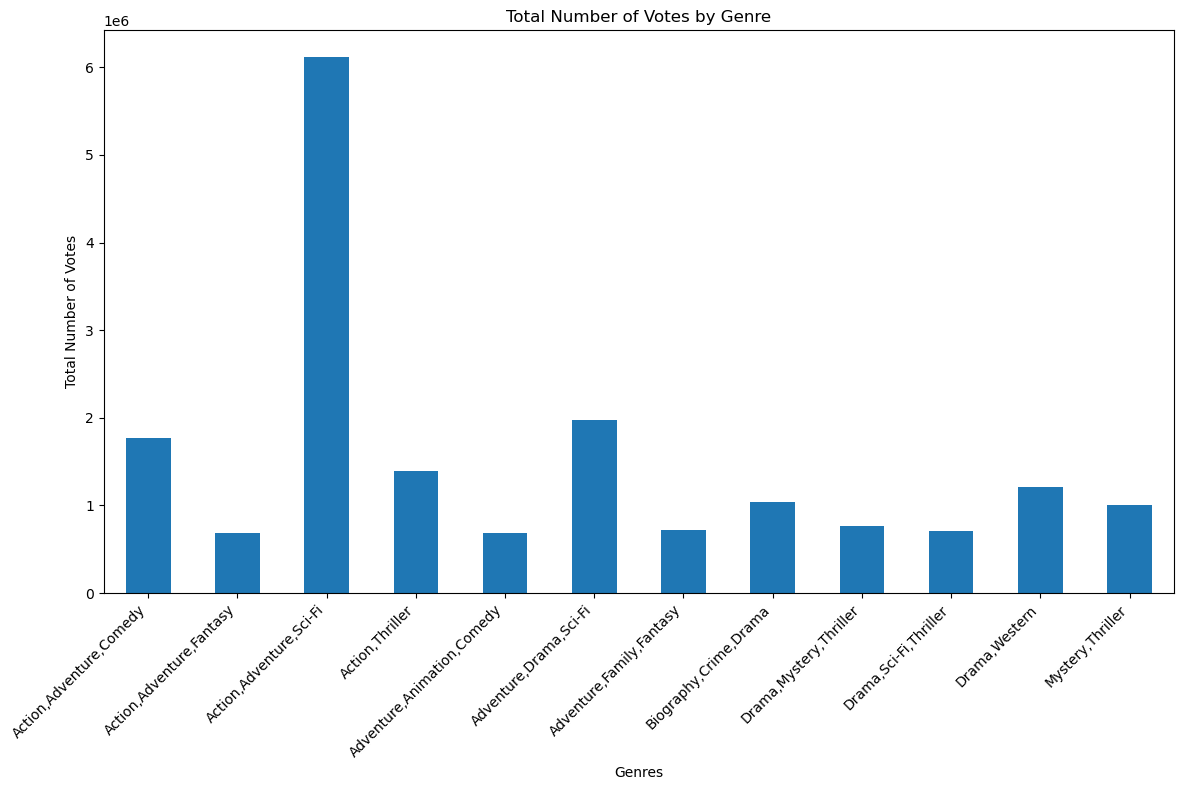

In [11]:
#1 Number of votes vs Genres
# Grouped bar plot for numvotes by genres
plt.figure(figsize=(12, 8))
merged_data_df_sorted.groupby('genres')['numvotes'].sum().plot(kind='bar')
plt.xlabel('Genres')
plt.ylabel('Total Number of Votes')
plt.title('Total Number of Votes by Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [12]:
#identifying outliers in the above
# Calculate quartiles
Q1 = np.percentile(merged_data_df['numvotes'], 25)
Q3 = np.percentile(merged_data_df['numvotes'], 75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = merged_data_df[(merged_data_df['numvotes'] < lower_bound) | (merged_data_df['numvotes'] > upper_bound)]

# Display outliers
outliers.head()


,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title,studio,domestic_gross_y,foreign_gross,year,averagerating,numvotes
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000.0,2011,6.6,447624
1,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,7.3,665594
2,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",Avengers: Infinity War,BV,678800000.0,1369.5,2018,8.5,670926
3,9,"Nov 17, 2017",Justice League,300000000.0,229024295.0,6.559452e+08,tt0974015,Justice League,Justice League,2017,120.0,"Action,Adventure,Fantasy",Justice League,WB,229000000.0,428900000.0,2017,6.5,329135
4,10,"Nov 6, 2015",Spectre,300000000.0,200074175.0,8.796209e+08,tt2379713,Spectre,Spectre,2015,148.0,"Action,Adventure,Thriller",Spectre,Sony,200100000.0,680600000.0,2015,6.8,352504


In [13]:
#Conclusion and Recommendations on genres vs numvotes
recommendations = """
###
Conclusions:
The bar graph shows that Action,Adventure and Sci-Fi have the most numvotes than the rest of the genres.
Movies with significantly high number of votes shows movies that have gaine popularity.
Movies with significantly less number of votes are less popular.
Lower outliers may represent niche films.
Certain movie geres when combined with other genres boost popularity of the niche genres


Recommendations:
1. Focus on the high number of votes on movie genres as they indicate popularity.
2. Utilize the Niche films to target niche audiences effectively.
3. Pair up popular movie genres with the niche genres to maximizes on increasing popularity

"""
print(recommendations)


###
Conclusions:
The bar graph shows that Action,Adventure and Sci-Fi have the most numvotes than the rest of the genres.
Movies with significantly high number of votes shows movies that have gaine popularity.
Movies with significantly less number of votes are less popular.
Lower outliers may represent niche films.
Certain movie geres when combined with other genres boost popularity of the niche genres


Recommendations:
1. Focus on the high number of votes on movie genres as they indicate popularity.
2. Utilize the Niche films to target niche audiences effectively.
3. Pair up popular movie genres with the niche genres to maximizes on increasing popularity




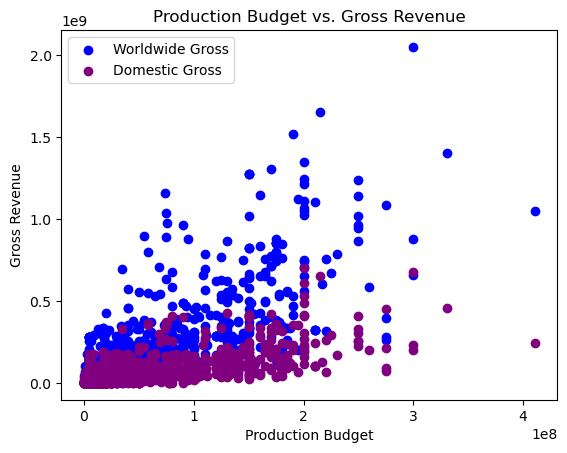

In [14]:
#2 Product budget vs Gross Revenue
# Scatter plot of budget vs. worldwide gross
plt.scatter(merged_data_df['production_budget'], merged_data_df['worldwide_gross'], label='Worldwide Gross', color='blue')

# Scatter plot of budget vs. domestic gross
plt.scatter(merged_data_df['production_budget'], merged_data_df['domestic_gross_y'], label='Domestic Gross', color='purple')

plt.xlabel('Production Budget')
plt.ylabel('Gross Revenue')
plt.title('Production Budget vs. Gross Revenue')
plt.legend()
plt.show()


In [15]:
#Conclusion and Recommendations on Production revenue vs Gross revenue
recommendations = """
###Conclusions:
Scatter plot suggests +ve correlation between production revenue and gross revenue.
Movies with higher production budget recieve higher grosss revenue.
As production budget increase,gross revenue increases as well.
Some movies with high production budgets may not perform well at box office resulting to low gross revenue.


Recommendations:
1. Allocate resoursces carefully based on thorough analysis.
2. Production companies can valuable resources and expertise to optimiye production outcomes and maximize gross revenues.
3. Production companies make their content to meet target audiences demands,
hence increasing success in maximizing gross revenues.
"""
print(recommendations)


###Conclusions:
Scatter plot suggests +ve correlation between production revenue and gross revenue.
Movies with higher production budget recieve higher grosss revenue.
As production budget increase,gross revenue increases as well.
Some movies with high production budgets may not perform well at box office resulting to low gross revenue.


Recommendations:
1. Allocate resoursces carefully based on thorough analysis.
2. Production companies can valuable resources and expertise to optimiye production outcomes and maximize gross revenues.
3. Production companies make their content to meet target audiences demands,
hence increasing success in maximizing gross revenues.



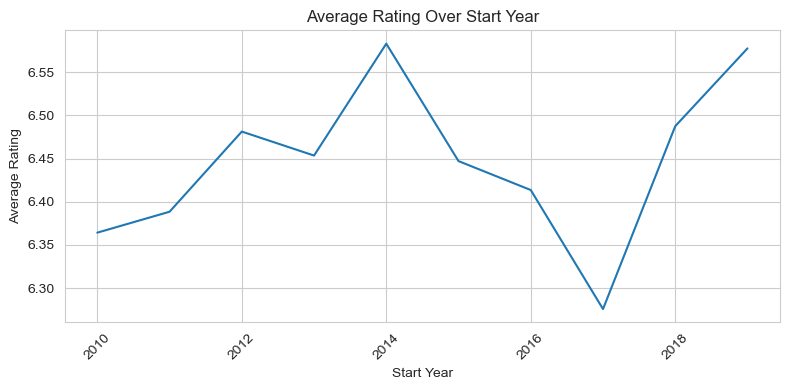

In [16]:
#3.Start year vs Average rating 
# Set the style of seaborn
sns.set_style("whitegrid")

# Create a line plot for start year vs. average rating
plt.figure(figsize=(8, 4))
sns.lineplot(x='start_year', y='averagerating', data=merged_data_df, ci=None)
plt.title('Average Rating Over Start Year')
plt.xlabel('Start Year')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()



In [17]:
 #Conclusion and Recommendations on Start year vs Average rating 
recommendations = """
###
Conclusions:
The line plot illustrates the trends of average ratings of movies over the years.
Variation shows changes in the reception of movies over the years.
Average ratings change over time depending on audience preferences.



Recommendations:
1. Access trends and identify patterns so as to make more informed decisions.
2. Change in movie quality or audince preference may vary over the years,
hence producers should make informed decisions regarding release strategies.
3.Audience engagement through movie trailers can help them 
analyz audience expectations and improve in the production of the movies to audience preferences.
"""
print(recommendations)


###
Conclusions:
The line plot illustrates the trends of average ratings of movies over the years.
Variation shows changes in the reception of movies over the years.
Average ratings change over time depending on audience preferences.



Recommendations:
1. Access trends and identify patterns so as to make more informed decisions.
2. Change in movie quality or audince preference may vary over the years,
hence producers should make informed decisions regarding release strategies.
3.Audience engagement through movie trailers can help them 
analyz audience expectations and improve in the production of the movies to audience preferences.



In [19]:

# Sort domestic gross earnings in descending 
merged_data_df_sorted = merged_data_df.sort_values(by='domestic_gross_x', ascending=False)

# Add limit 
top_genres_df = merged_data_df_sorted['genres'].value_counts().head(10).index

# Filter to include only the top genres
top_genre_data_df = merged_data_df_sorted[merged_data_df_sorted['genres'].isin(top_genres_df)]
top_genre_data_df.head(10)

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title,studio,domestic_gross_y,foreign_gross,year,averagerating,numvotes
31,42,"Feb 16, 2018",Black Panther,200000000.0,700059566.0,1.348258e+09,tt1825683,Black Panther,Black Panther,2018,134.0,"Action,Adventure,Sci-Fi",Black Panther,BV,700100000.0,646900000.0,2018,7.3,516148
2,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",Avengers: Infinity War,BV,678800000.0,1369.5,2018,8.5,670926
21,34,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1.648855e+09,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",Jurassic World,Uni.,652300000.0,1019.4,2015,7.0,539338
33,45,"Dec 16, 2016",Rogue One: A Star Wars Story,200000000.0,532177324.0,1.049103e+09,tt3748528,Rogue One: A Star Wars Story,Rogue One,2016,133.0,"Action,Adventure,Sci-Fi",Rogue One: A Star Wars Story,BV,532200000.0,523900000.0,2016,7.8,478592
34,46,"Jun 17, 2016",Finding Dory,200000000.0,486295561.0,1.021215e+09,tt2277860,Finding Dory,Finding Dory,2016,97.0,"Adventure,Animation,Comedy",Finding Dory,BV,486300000.0,542300000.0,2016,7.3,213542
1,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,7.3,665594
143,38,"Nov 22, 2013",The Hunger Games: Catching Fire,130000000.0,424668047.0,8.648680e+08,tt1951264,The Hunger Games: Catching Fire,The Hunger Games: Catching Fire,2013,146.0,"Action,Adventure,Sci-Fi",The Hunger Games: Catching Fire,LGF,424700000.0,440300000.0,2013,7.5,575455
76,13,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170000000.0,417719760.0,1.305773e+09,tt4881806,Jurassic World: Fallen Kingdom,Jurassic World: Fallen Kingdom,2018,128.0,"Action,Adventure,Sci-Fi",Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018,6.2,219125
35,47,"Jun 18, 2010",Toy Story 3,200000000.0,415004880.0,1.068880e+09,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",Toy Story 3,BV,415000000.0,652000000.0,2010,8.3,682218
36,48,"May 3, 2013",Iron Man 3,200000000.0,408992272.0,1.215392e+09,tt1300854,Iron Man 3,Iron Man Three,2013,130.0,"Action,Adventure,Sci-Fi",Iron Man 3,BV,409000000.0,805800000.0,2013,7.2,692794


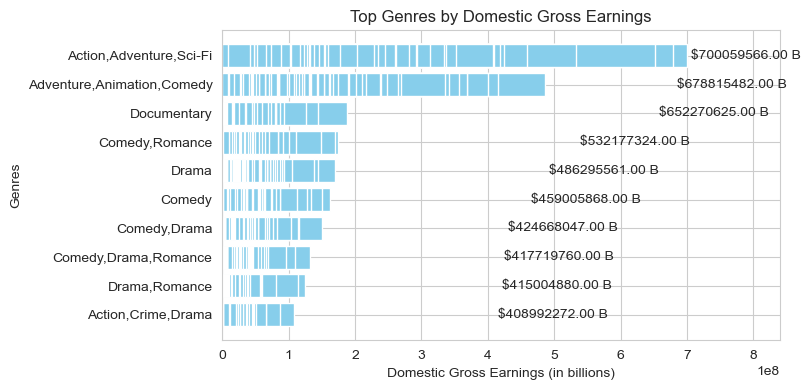

In [20]:
#4. genres vs domestic earnings
# Plotting genre vs domestic earnings
plt.figure(figsize=(8, 4))
plt.barh(top_genre_data_df['genres'], top_genre_data_df['domestic_gross_x'], color='skyblue')
plt.xlabel('Domestic Gross Earnings (in billions)')
plt.ylabel('Genres')
plt.title('Top Genres by Domestic Gross Earnings')
plt.gca().invert_yaxis()  # Invert y-axis to display the genre with the highest earnings at the top

#maximum gross earnings for the top genres
max_earnings = top_genre_data_df.head(10)['domestic_gross_x'].max()

# set limit
plt.xlim(0, max_earnings * 1.2)  

plt.tight_layout()

# Add labels to the bars displaying the actual values of 10 domestic gross earnings
for index, value in enumerate(top_genre_data_df.head(10)['domestic_gross_x']):
    plt.text(value, index, f' ${value:.2f} B', va='center')

plt.show()


In [21]:
 #Conclusion and Recommendations on Genres and Domestic Gross 
recommendations = """
###
The domestic gross earnings for each genre are represented by the lengths of the bars.
Longer bars indicate higher domestic gross earnings for movies in those genres.
Action,Adventure,Sci-fi movies have higher domestic grooss than comedy,Drama.
Audience prefence can influence financial performance in the domestic market.


Recommendations:
1. Prioritize genres with high domestic gross.
2. Allocate resourses in genres that are highly performing.
3. Encourage creativity and innovation to diffrenciate between movies categories.
3. Market research on evolving audience preferences,trends and patterns.
"""
print(recommendations)


###
The domestic gross earnings for each genre are represented by the lengths of the bars.
Longer bars indicate higher domestic gross earnings for movies in those genres.
Action,Adventure,Sci-fi movies have higher domestic grooss than comedy,Drama.
Audience prefence can influence financial performance in the domestic market.


Recommendations:
1. Prioritize genres with high domestic gross.
2. Allocate resourses in genres that are highly performing.
3. Encourage creativity and innovation to diffrenciate between movies categories.
3. Market research on evolving audience preferences,trends and patterns.



In [22]:
# 5.Box office performance by genre
genre_box_office = merged_data_df.groupby('genres')['domestic_gross_x'].mean().sort_values(ascending=False)
genre_box_office.head(10)

genres
Documentary,Drama,Sport          4.125634e+08
Sci-Fi                           4.125634e+08
Adventure,Drama,Sport            4.007380e+08
Fantasy,Romance                  4.007380e+08
Biography,Documentary,History    3.564617e+08
Comedy,Mystery                   2.544643e+08
Action,Adventure,Sci-Fi          2.480170e+08
Adventure,Drama,Sci-Fi           2.082258e+08
Adventure,Fantasy                1.928914e+08
Animation,Comedy,Family          1.750288e+08
Name: domestic_gross_x, dtype: float64

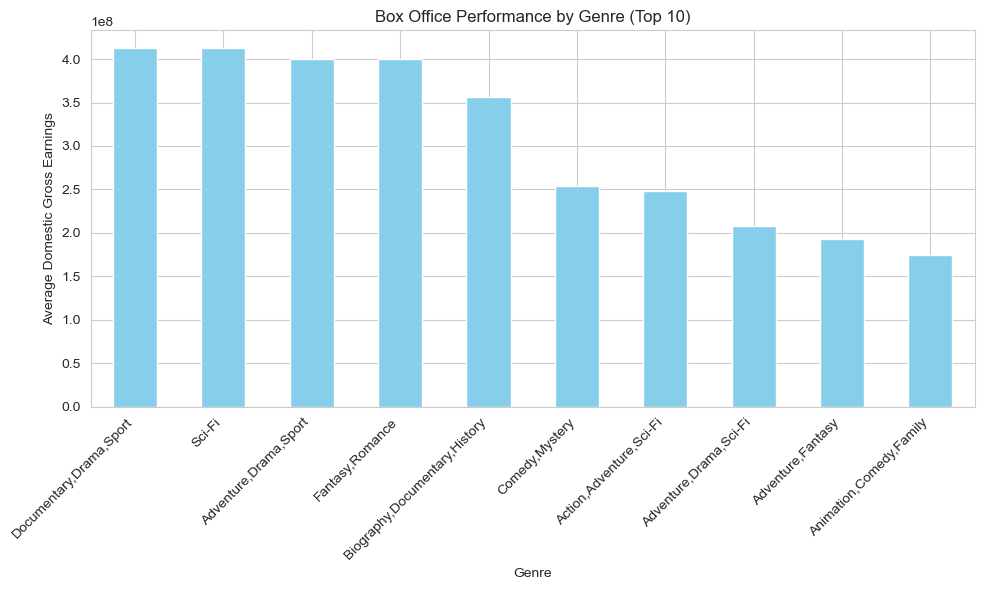

In [23]:

# Group the data by genre then calculate the mean domestic gross earnings for each genre
genre_box_office = merged_data_df.groupby('genres')['domestic_gross_x'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
genre_box_office.head(10).plot(kind='bar', color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Average Domestic Gross Earnings')
plt.title('Box Office Performance by Genre (Top 10)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [24]:
 #Conclusion and Recommendations on Box office performance by genre
recommendations = """
###
Certain genres generate higher value domestic gross earnings compared to others.
Genre preference has influence on audience ticket purchase.
Top performing genres can be used by producers to mximize box office revenue.
The popularity of the genre reflects on audience preferences.


Recommendations:
1. Maximize audience involvement in marketing campaigns.
2. Allocate resourses in genres that are highly performing.
3. Collaborate with industries to increase box office reavenue via fanbase and expertise.
3. Market research on evolving audience preferences,trends and patterns.
"""
print(recommendations)


###
Certain genres generate higher value domestic gross earnings compared to others.
Genre preference has influence on audience ticket purchase.
Top performing genres can be used by producers to mximize box office revenue.
The popularity of the genre reflects on audience preferences.


Recommendations:
1. Maximize audience involvement in marketing campaigns.
2. Allocate resourses in genres that are highly performing.
3. Collaborate with industries to increase box office reavenue via fanbase and expertise.
3. Market research on evolving audience preferences,trends and patterns.



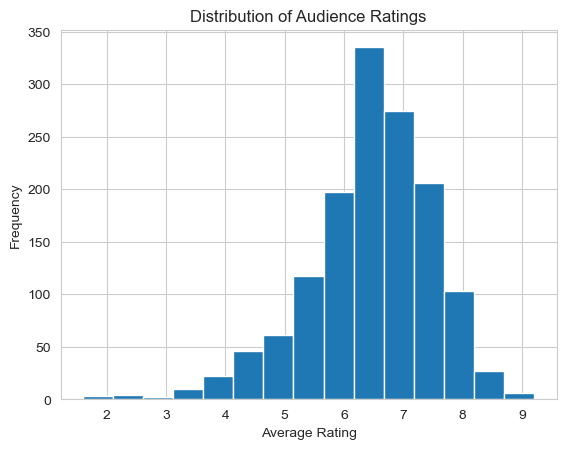

In [25]:
# 6 Distribution of audience ratings
plt.hist(merged_data_df['averagerating'], bins=15)
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Audience Ratings')
plt.show()


In [26]:
#identifying outliers in the above
# Calculate quartiles
Q1 = np.percentile(merged_data_df['averagerating'], 25)
Q3 = np.percentile(merged_data_df['averagerating'], 75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = merged_data_df[(merged_data_df['averagerating'] < lower_bound) | (merged_data_df['averagerating'] > upper_bound)]

# Display outliers
outliers.head()


,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title,studio,domestic_gross_y,foreign_gross,year,averagerating,numvotes
115,83,"Jul 1, 2010",The Last Airbender,150000000.0,131772187.0,319713881.0,tt0938283,The Last Airbender,The Last Airbender,2010,103.0,"Action,Adventure,Family",The Last Airbender,Par.,131800000.0,187900000.0,2010,4.1,137734
227,46,"Apr 15, 2011",Rio,90000000.0,143619809.0,487519809.0,tt5734820,Rio,Rio,2017,87.0,Drama,Rio,Fox,143600000.0,341000000.0,2011,2.6,7
259,11,"Nov 11, 2011",Jack and Jill,79000000.0,74158157.0,150519217.0,tt0810913,Jack and Jill,Jack and Jill,2011,91.0,Comedy,Jack and Jill,Sony,74200000.0,75500000.0,2011,3.3,71361
360,77,"Dec 25, 2014",Into the Woods,56200000.0,128002372.0,213116401.0,tt2201083,Into the Woods,Into the Woods,2012,105.0,Thriller,Into the Woods,BV,128000000.0,85100000.0,2014,2.6,167
396,7,"Jul 28, 2017",The Emoji Movie,50000000.0,86089513.0,216562312.0,tt4877122,The Emoji Movie,The Emoji Movie,2017,86.0,"Adventure,Animation,Comedy",The Emoji Movie,Sony,86100000.0,131699999.0,2017,3.2,47294


In [27]:
 #Conclusion and Recommendations on AverageRatings vs movies frequency
recommendations = """
###
Conclusions:
The histogram is symmetrical and ratings are evenly distributed at the center.
A peak at high rating indicates that a significant number of movies are well recieved by the audience.
Apeak at the lower rating suggests lower audience satisifaction.
Movies with most frequency recieve average ratings.
Some movies have very low rating and others very high.
Outliers indicate that budget and ratings might affect movie production and reception.

Recommendations:
1. Continue producing movies that align with audience preference to maintain high ratings.
2. Optimize runtime durations to align with audience preferences and improve the overall quality of movies.
3.Factors like production budget allocation should be optimized.
"""
print(recommendations)


###
Conclusions:
The histogram is symmetrical and ratings are evenly distributed at the center.
A peak at high rating indicates that a significant number of movies are well recieved by the audience.
Apeak at the lower rating suggests lower audience satisifaction.
Movies with most frequency recieve average ratings.
Some movies have very low rating and others very high.
Outliers indicate that budget and ratings might affect movie production and reception.

Recommendations:
1. Continue producing movies that align with audience preference to maintain high ratings.
2. Optimize runtime durations to align with audience preferences and improve the overall quality of movies.
3.Factors like production budget allocation should be optimized.



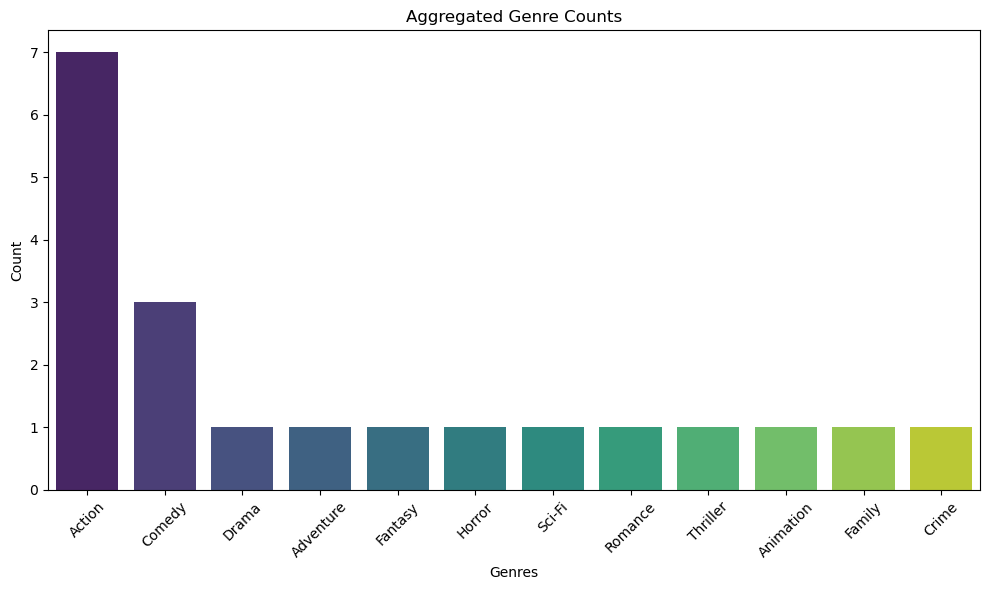

In [40]:
#7 genre vs counts
# Sample movie data
movie_data = pd.DataFrame({
    'movie_id': range(1, 21),
    'title': ['Movie' + str(i) for i in range(1, 21)],
    'genres': ['Action', 'Comedy', 'Drama', 'Action, Comedy', 'Action, Drama',
               'Comedy, Drama', 'Action, Adventure', 'Adventure, Fantasy', 'Fantasy, Drama',
               'Action, Comedy, Drama', 'Horror', 'Sci-Fi', 'Comedy, Romance', 'Romance, Drama',
               'Thriller', 'Action, Thriller', 'Animation, Family', 'Family, Fantasy',
               'Action, Adventure, Sci-Fi', 'Crime, Drama']
})

# Bar plot with aggregated counts
plt.figure(figsize=(10, 6))
movie_data['genres_agg'] = movie_data['genres'].apply(lambda x: x.split(',')[0])  # Aggregate genres
genre_counts = movie_data['genres_agg'].value_counts()
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Aggregated Genre Counts')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [28]:
# Conclusion and Recommendations on Genres vs Count
recommendations = """
###
Conclusions:
Action movie has the highest count and comedy has a higher count than the other movie genres.
Recommendations:
1. Focus on genres with the highest counts over different start years to attract more viewers.
2. Consider the popularity of movie genres when planning production budgets and marketing strategies.
3. Explore opportunities for diversifying movie genres to appeal to a wider audience demographic.
"""
print(recommendations)


###
Conclusions:
Action movie has the highest count and comedy has a higher count than the other movie genres.
Recommendations:
1. Focus on genres with the highest counts over different start years to attract more viewers.
2. Consider the popularity of movie genres when planning production budgets and marketing strategies.
3. Explore opportunities for diversifying movie genres to appeal to a wider audience demographic.



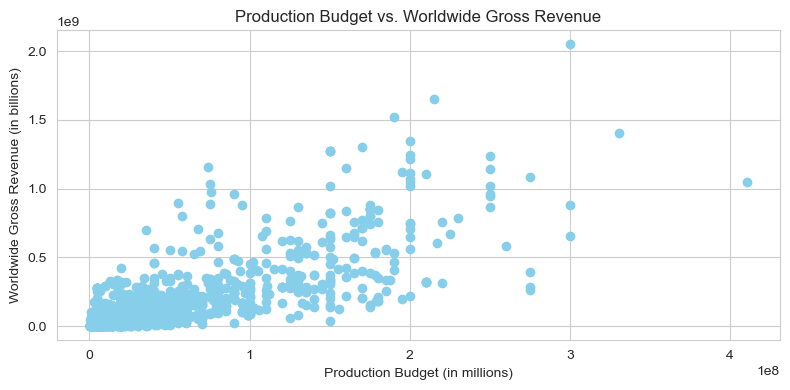

In [29]:
#8. Correlation betweenworls widegross production budget

# Scatter plot 
plt.figure(figsize=(8, 4))
plt.scatter(merged_data_df['production_budget'], merged_data_df['worldwide_gross'], color='skyblue')
plt.xlabel('Production Budget (in millions)')
plt.ylabel('Worldwide Gross Revenue (in billions)')
plt.title('Production Budget vs. Worldwide Gross Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()





In [30]:
# Conclusion and Recommendations on worldwide grosss by production budget.
Conclusions = """
###
The scatter plot is clustered.
As the production budget increases the worldwide gross increases.
This is a possitive correlation.
"""
print(Conclusions)



###
The scatter plot is clustered.
As the production budget increases the worldwide gross increases.
This is a possitive correlation.



In [31]:
#correlation between ratings and box office gross

rating_correlation = merged_data_df['averagerating'].corr(merged_data_df['domestic_gross_x'])
print("Correlation between ratings and box office gross:", rating_correlation)



Correlation between ratings and box office gross: 0.19520412734142323


In [32]:
# Conclusion and Recommendations on ratings and box office gross
Conclusions = """
###
This is a negative correlation.
Showing you cannot draw  meaningful insights using ratings by box office gross

"""
print(Conclusions)



###
This is a negative correlation.
Showing you cannot draw  meaningful insights using ratings by box office gross




In [33]:
Overall_Recommendation= """
CONCLUSIONS
1.Movies with higher production budgets have higher box office earning.
2.Investing more in production leads to higher box office revenues.
3.Frequency distribution of genres reveal that certain movie genre perfom better than others in terms of domestic earnings.
4.Ratings are clustered around a certain range.
5.Rating shows audience preferences and genre popularity.
6.Box office performance fluctuats overtime hence market research should be done.

RECOMMENDATIONS
1.Focus on producing movies that have demonstrated strong perfomance in box office.
2.Allocate resources strategically by investing in high potential movie projects with higher production budget.
3.Monitor market trends and audience preferrence to optimize release timings.
4.Pay attention to Factors beyound audience ratings.


"""
print(Overall_Recommendation)



CONCLUSIONS
1.Movies with higher production budgets have higher box office earning.
2.Investing more in production leads to higher box office revenues.
3.Frequency distribution of genres reveal that certain movie genre perfom better than others in terms of domestic earnings.
4.Ratings are clustered around a certain range.
5.Rating shows audience preferences and genre popularity.
6.Box office performance fluctuats overtime hence market research should be done.

RECOMMENDATIONS
1.Focus on producing movies that have demonstrated strong perfomance in box office.
2.Allocate resources strategically by investing in high potential movie projects with higher production budget.
3.Monitor market trends and audience preferrence to optimize release timings.
4.Pay attention to Factors beyound audience ratings.



